In [ ]:
#!pip install opendatasets

In [ ]:
dataset_url = 'https://www.kaggle.com/datasets/arjuntejaswi/plant-village'
import opendatasets
opendatasets.download(dataset_url)

In [ ]:
#filter the dataset to get only potato data
import shutil
import os
BASE_DIR = os.getcwd()
main_dir = '/content/plant-village/PlantVillage'
directories = os.listdir('/content/plant-village/PlantVillage')

dir_to_remove = []
for directory in directories:
  if not directory.startswith('Potato'):
    dir_to_remove.append(directory)

for dir in dir_to_remove:
  fullpath = os.path.join(main_dir,dir)
  shutil.rmtree(fullpath)

In [ ]:
#!pip install split-folders[full]
import splitfolders
splitfolders.ratio('/content/plant-village/PlantVillage',output='dataset',ratio =(.7,.1,.2) )

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,InputLayer
from keras.utils import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import img_to_array,load_img
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#load the images
DIRECTORY_NAME = '/content/plant-village/PlantVillage'
IMAGE_SIZE = 256
BATCH_SIZE = 32
dataset = image_dataset_from_directory(
    DIRECTORY_NAME,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    shuffle=True)

Found 2152 files belonging to 3 classes.


In [ ]:
class_names =dataset.class_names

In [ ]:
#create a numpy iterator,take a batch 
# a batch containing 32 images and their labels
dataset_numpy_iterator = dataset.as_numpy_iterator()
batch = dataset_numpy_iterator.next()
image,labels = batch

In [ ]:
image[0].shape

(256, 256, 3)

In [ ]:
labels

array([1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 2, 1, 0, 1], dtype=int32)

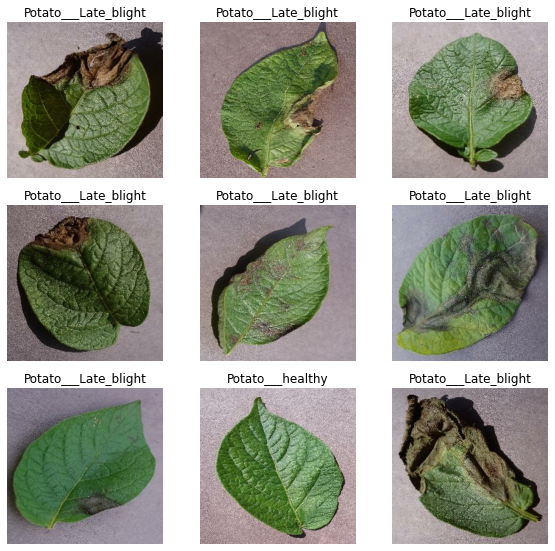

In [ ]:
plt.figure(figsize=(8,8))
for index in range(9):
  plt.subplot(3,3,index+1)
  plt.imshow(image[index].astype('uint8'))
  plt.title(f'{class_names[labels[index]]}')
  plt.tight_layout()
  plt.axis('off')

plt.show()


In [ ]:
DATASET_SIZE = len(dataset)
TRAINING_SIZE = round(DATASET_SIZE*0.8)
TESTING_SIZE =  round(DATASET_SIZE*0.1)
VALIDATION_SIZE = round(DATASET_SIZE*0.1)
print('Dataset_size: ',DATASET_SIZE)
print('Training size: ',TRAINING_SIZE)
print('Testing size: ',TESTING_SIZE)
print('Validation size: ',VALIDATION_SIZE)

Dataset_size:  68
Training size:  54
Testing size:  7
Validation size:  7


In [ ]:
training_dataset = dataset.take(TRAINING_SIZE)
testing_dataset = dataset.skip(TRAINING_SIZE).take(TESTING_SIZE)
validation_dataset = dataset.skip(TRAINING_SIZE+TESTING_SIZE).take(VALIDATION_SIZE)

In [ ]:
INPUT_SHAPE = (256, 256, 3)
N_CLASSES = 3

In [ ]:
def create_generator(directory):
    datagen = ImageDataGenerator(
        rescale = 1./255,
        horizontal_flip = True,
        rotation_range = 10   
    )
    generator = datagen.flow_from_directory(
        directory,
        target_size = (IMAGE_SIZE,IMAGE_SIZE),
        batch_size = BATCH_SIZE,
        class_mode = 'sparse'
    )
    return generator

train_generator = create_generator('/content/dataset/train')
validation_generator = create_generator('/content/dataset/val')
testing_generator = create_generator('/content/dataset/test')


In [ ]:
#train neural network
model = Sequential([
    InputLayer(input_shape =INPUT_SHAPE),

    Conv2D(256,(3,3),activation = 'relu'),
    MaxPool2D((2,2)),
    Conv2D(128,(3,3),activation = 'relu'),
    MaxPool2D((2,2)),
    Conv2D(64,(3,3),activation = 'relu'),
    MaxPool2D((2,2)),
    Conv2D(32,(3,3),activation = 'relu'),
    MaxPool2D((2,2)),

    Flatten(),
    Dense(64,activation ='relu'),
    Dense(N_CLASSES,activation = 'softmax')
    
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 256)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 128)     295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
no_images_in_train = 1506
image_num = 32
step_per_epochs = int(no_images_in_train/image_num)
validation_steps = int(215/32)

6

In [ ]:
model_history = model.fit(train_generator,
          steps_per_epoch = step_per_epochs,
          batch_size = 32,
          validation_data = validation_generator,
          validation_steps = validation_steps,
          verbose = 1,
          epochs = 20  
          )

Epoch 1/20
47/47 [==============================] - 45s 645ms/step - loss: 0.8752 - accuracy: 0.5332 - val_loss: 0.6425 - val_accuracy: 0.7708
Epoch 2/20
47/47 [==============================] - 29s 619ms/step - loss: 0.5174 - accuracy: 0.7972 - val_loss: 0.4315 - val_accuracy: 0.8281
Epoch 3/20
47/47 [==============================] - 31s 654ms/step - loss: 0.3272 - accuracy: 0.8670 - val_loss: 0.3590 - val_accuracy: 0.8385
Epoch 4/20
47/47 [==============================] - 31s 661ms/step - loss: 0.3044 - accuracy: 0.8799 - val_loss: 0.2413 - val_accuracy: 0.8958
Epoch 5/20
47/47 [==============================] - 28s 604ms/step - loss: 0.2467 - accuracy: 0.8955 - val_loss: 0.2203 - val_accuracy: 0.9219
Epoch 6/20
47/47 [==============================] - 29s 610ms/step - loss: 0.1738 - accuracy: 0.9308 - val_loss: 0.2307 - val_accuracy: 0.8958
Epoch 7/20
47/47 [==============================] - 30s 628ms/step - loss: 0.1560 - accuracy: 0.9355 - val_loss: 0.1359 - val_accuracy: 0.9167

In [ ]:
training_history_df= pd.DataFrame(model_history.history)
training_history_df

,loss,accuracy,val_loss,val_accuracy
0,0.875224,0.533245,0.642500,0.770833
1,0.517441,0.797151,0.431488,0.828125
2,0.327151,0.867028,0.359043,0.838542
3,0.304352,0.879919,0.241296,0.895833
4,0.246707,0.895522,0.220252,0.921875
5,0.173787,0.930801,0.230710,0.895833
6,0.156019,0.935549,0.135936,0.916667
7,0.192622,0.923338,0.240769,0.901042
8,0.132393,0.947761,0.110102,0.953125
9,0.117612,0.955902,0.163147,0.927083


<Figure size 576x576 with 0 Axes>

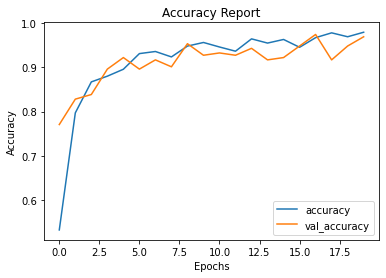

In [ ]:
accuracy_df = training_history_df[['accuracy','val_accuracy']]
loss_df = training_history_df[['loss','val_loss']]
plt.figure(figsize=(8,8))
accuracy_df.plot() 
plt.title('Accuracy Report')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

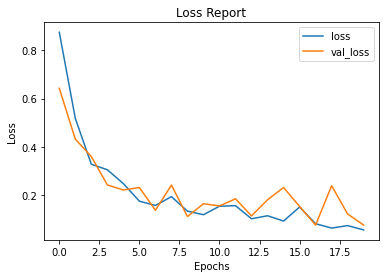

In [ ]:
loss_df.plot()
plt.title('Loss Report')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
loss,accuracy = model.evaluate(testing_generator)
print('Model Loss: ',loss)
print('Model Accuracy: ',round(accuracy,2))

14/14 [==============================] - 7s 510ms/step - loss: 0.0969 - accuracy: 0.9652
Model Loss:  0.09690721333026886
Model Accuracy:  0.97


In [ ]:
prediction = model.predict(testing_generator)

In [ ]:
prediction_labels = [np.argmax(pred) for pred in prediction]
actual_labels = testing_generator.labels 
prediction_df = pd.DataFrame({'Actual Label':actual_labels,'Predicted Label':test_labels})
prediction_df

,Actual Label,Predicted Label
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
426,2,2
427,2,2
428,2,2
429,2,2


In [ ]:
#predictive system
def predict_result(model,image):
  img = img_to_array(image)
  input_array = tf.expand_dims(img,0)
  new_prediction = model.predict(input_array)
  predicted_class = class_names[np.argmax(new_prediction[0])]
  confidence = round(100*(np.max(prediction[0])),2)
  
  return  predicted_class,confidence

predicted_label,confidence = predict_result(model,image[0])
print(predicted_label,confidence)

1/1 [==============================] - 0s 154ms/step
Potato___Early_blight 100.0


1/1 [==============================] - 0s 28ms/step


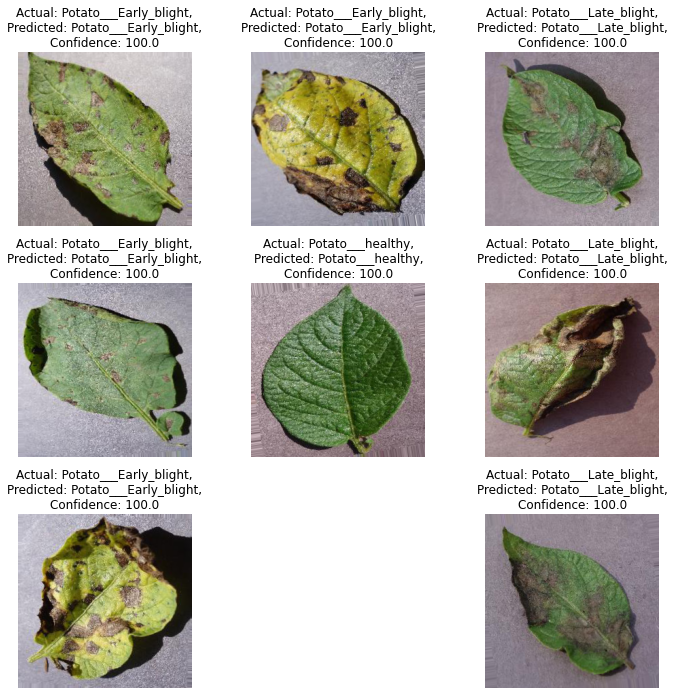

In [120]:
#sample images
images,labels = testing_generator.next()
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(images[i])
  #make prediction
  predicted_class,confidence = predict_result(model,images[i])
  actual_class = class_names[int(labels[i])]
  plt.tight_layout()
  plt.axis('off')
  plt.title(f'Actual: {actual_class},\nPredicted: {predicted_class},\nConfidence: {confidence}')

plt.show()




In [ ]:
#save the model
model.save('potato.h5')